In [27]:
from ipywidgets import *

#### Используя данные World Development Indicators (http://data.worldbank.org/indicator), рассчитайте среднегодовой темп роста реального ВВП за 1980-2022 гг. (или за максимально доступный период времени внутри этого интервала) для следующих стран: Россия, Германия, Франция, Великобритания, Япония, США, Китай, Индия.
![EMIT](EMIT.png)

#### Импорт библиотек и файла

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
gdp = pd.read_csv('GDP growth (annual %).csv')

#### Выбираю нужные страны

In [17]:
countries = ['Russian Federation', 'Germany', 'France', 'United Kingdom', 'Japan', 'United States', 'China', 'India']
gdp_needed = gdp[gdp['Country Name'].isin(countries)]
gdp_needed

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
40,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.239702,8.109793,NaN
55,Germany,DEU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987,NaN
77,France,FRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.980112,6.843470,6.233680,6.652100,4.861508,...,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.784586,6.816589,NaN
81,United Kingdom,GBR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.524910,NaN
109,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.722743,2.931128,5.994353,7.452950,-2.635770,...,6.386106,7.410228,7.996254,8.256306,6.795383,6.453851,3.737919,-6.596081,8.681229,NaN
119,Japan,JPN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.584068,-0.240351,-4.506905,1.657071,NaN
202,Russian Federation,RUS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.755422,0.736267,-1.972719,0.193690,1.825790,2.807245,2.198076,-2.663758,4.749584,NaN
251,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,NaN


#### Удаляю ненужные колонки

In [18]:
gdp_needed = gdp_needed.drop(columns=['Indicator Code', 'Indicator Name', 'Country Code', 'Unnamed: 66'])
gdp_needed

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,...,7.863736,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.239702,8.109793
55,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.418498,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987
77,France,NaN,4.980112,6.843470,6.233680,6.652100,4.861508,5.251837,4.921149,4.491309,...,0.313135,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.784586,6.816589
81,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.448457,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.524910
109,India,NaN,3.722743,2.931128,5.994353,7.452950,-2.635770,-0.055329,7.825963,3.387929,...,5.456389,6.386106,7.410228,7.996254,8.256306,6.795383,6.453851,3.737919,-6.596081,8.681229
119,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,1.374751,2.005100,0.296206,1.560627,0.753827,1.675332,0.584068,-0.240351,-4.506905,1.657071
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.024086,1.755422,0.736267,-1.972719,0.193690,1.825790,2.807245,2.198076,-2.663758,4.749584
251,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,2.280688,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485


##### Смотрю какого формата значения в колонках перед их обработкой

In [19]:
gdp_needed.dtypes

Country Name     object
1960            float64
1961            float64
1962            float64
1963            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 63, dtype: object

### Решил нарисовать график GDP trend for selected countries (Жесть Китай в 1961 жалко)

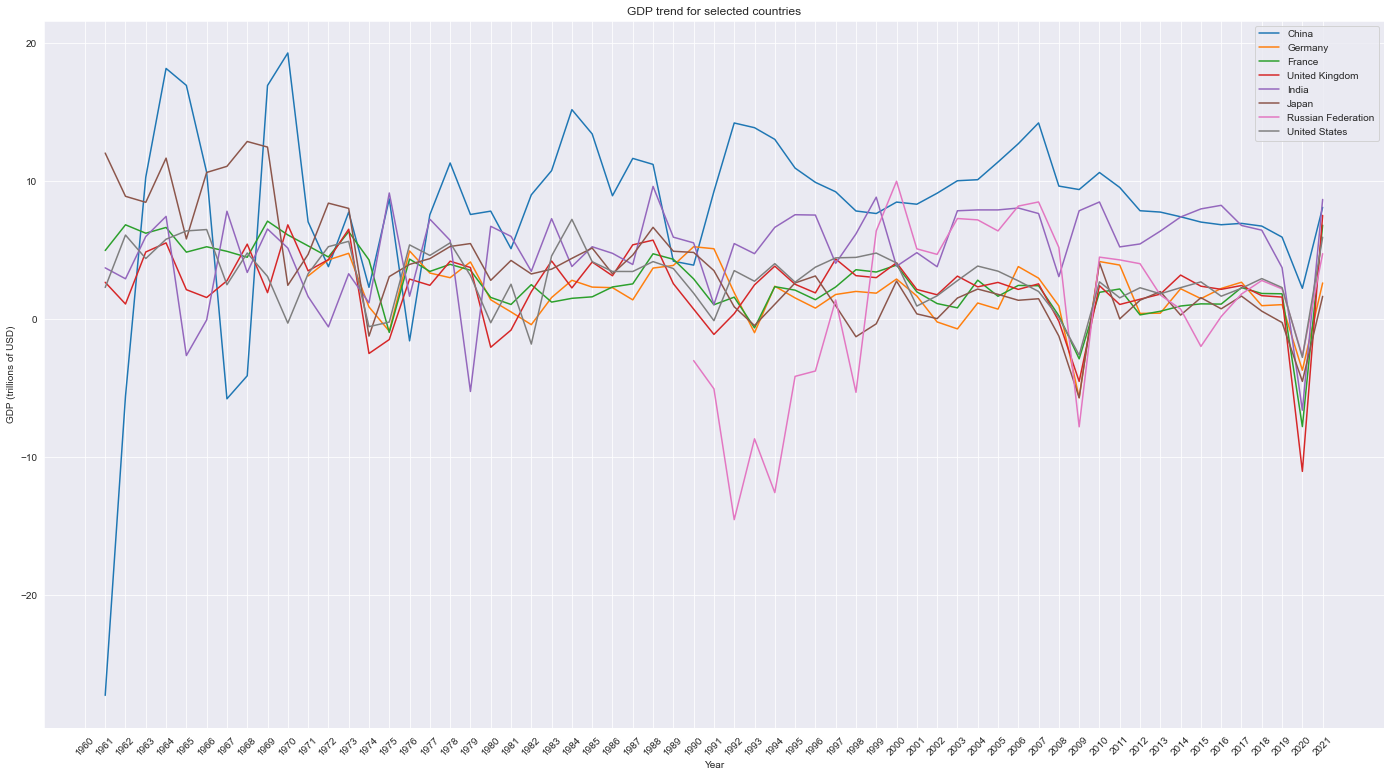

In [20]:
plt.figure(figsize=(24, 13))
for country in gdp_needed['Country Name'].unique():
        data = gdp_needed[gdp_needed['Country Name'] == country]
        plt.plot(data.columns[1:], data.values[0][1:], label=country)
plt.xlabel('Year')
plt.ylabel('GDP (trillions of USD)')
plt.title('GDP trend for selected countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Выбираю только данные с 1990 года, так как с этого года у всех стран отсутствуют пропущенные значения

In [21]:
gdp_needed['average_gdp_growth'] = gdp_needed.loc[:, "1990":"2021"].mean(axis=1)


In [22]:
gdp_needed

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_gdp_growth
40,China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.239702,8.109793,9.080792
55,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987,1.498351
77,France,NaN,4.980112,6.843470,6.233680,6.652100,4.861508,5.251837,4.921149,4.491309,...,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.784586,6.816589,1.500297
81,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.524910,1.697881
109,India,NaN,3.722743,2.931128,5.994353,7.452950,-2.635770,-0.055329,7.825963,3.387929,...,6.386106,7.410228,7.996254,8.256306,6.795383,6.453851,3.737919,-6.596081,8.681229,5.901521
119,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.584068,-0.240351,-4.506905,1.657071,0.905281
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.755422,0.736267,-1.972719,0.193690,1.825790,2.807245,2.198076,-2.663758,4.749584,0.876209
251,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.410561


#### Оставляю только колонки с ответом

In [23]:
gdp_needed_without_years = gdp_needed.drop(columns = gdp_needed.columns[1:-1])

In [24]:
gdp_needed_without_years_round = gdp_needed_without_years.copy()
gdp_needed_without_years_round['average_gdp_growth'] = gdp_needed_without_years['average_gdp_growth'].round(2)

In [25]:
gdp_needed_without_years

,Country Name,average_gdp_growth
40,China,9.080792
55,Germany,1.498351
77,France,1.500297
81,United Kingdom,1.697881
109,India,5.901521
119,Japan,0.905281
202,Russian Federation,0.876209
251,United States,2.410561


#### Округяю ответ

In [26]:
gdp_needed_without_years_round

,Country Name,average_gdp_growth
40,China,9.08
55,Germany,1.50
77,France,1.50
81,United Kingdom,1.70
109,India,5.90
119,Japan,0.91
202,Russian Federation,0.88
251,United States,2.41


# Maxim Lyara 2023